# Question 2: Linear Regression
a) Import and plot training, test data

In [1]:
import pandas as pd

x_train = pd.read_csv('/content/hw1xtr.dat.txt')
y_train = pd.read_csv('/content/hw1ytr.dat.txt')
x_test = pd.read_csv('/content/hw1xte.dat.txt')
y_test = pd.read_csv('/content/hw1yte.dat.txt')


Text(0, 0.5, 'Training Outputs')

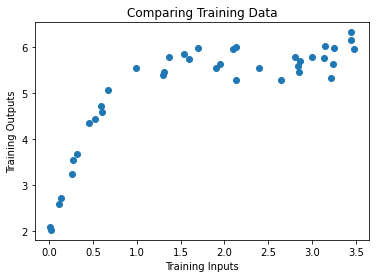

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)
plt.title('Comparing Training Data')
plt.xlabel('Training Inputs')
plt.ylabel('Training Outputs')

Text(0, 0.5, 'Test Outputs')

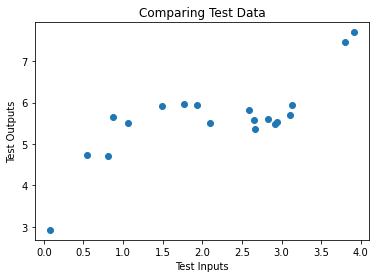

In [3]:
plt.scatter(x_test, y_test)
plt.title('Comparing Test Data')
plt.xlabel('Test Inputs')
plt.ylabel('Test Outputs')

b) Perform linear regression as per the exact solution. Perform matrix shape checks along the way to ensure dimensionality matches up for proper matrix multiplication & to ensure computation correct.

In [4]:
#Create column of 1s and append to training set of x-values (inputs)

import numpy as np

ones_col = pd.DataFrame(np.ones((x_train.shape[0], 1), dtype=int))
x_train = pd.merge(x_train, ones_col, left_index=True, right_index=True)
x_train.columns = ['data', 'ones']
x_train.head()

,data,ones
0,3.138190,1
1,3.442149,1
2,1.308341,1
3,0.995442,1
4,3.241455,1


In [5]:
#Formulate numpy arrays to easily do matrix operations, create the X matrix and its transpose from regression solution

x_train_matrix = x_train.to_numpy()
x_train_matrix_t = x_train_matrix.transpose()
print("Shape of X matrix is: " + str(x_train_matrix.shape))
print("Shape of transpose of X matrix is: " + str(x_train_matrix_t.shape))

Shape of X matrix is: (39, 2)
Shape of transpose of X matrix is: (2, 39)


In [6]:
#Compute the product of: (X^T)X

x_T_x = np.matmul(x_train_matrix_t, x_train_matrix)
print("Shape of (X^T)X is: " + str(x_T_x.shape))

Shape of (X^T)X is: (2, 2)


In [7]:
#Compute the inverse of ((X^T)X)

x_T_x_inv = np.linalg.inv(x_T_x)
print("Shape of ((X^T)X)-1 is: " + str(x_T_x_inv.shape))

Shape of ((X^T)X)-1 is: (2, 2)


In [8]:
#Compute (X^T)y

y_train_matrix = y_train.to_numpy()
x_T_y = np.matmul(x_train_matrix_t, y_train_matrix)
print("Shape of (X^T)y is: " + str(x_T_y.shape))

Shape of (X^T)y is: (2, 1)


In [9]:
#Compute the regression coefficients for w by ((X^T)X)-1 * (X^T)y

soln = np.matmul(x_T_x_inv, x_T_y)
soln

array([[0.78621257],
       [3.65153963]])

c) Plot the regression line against training and test sets, compute accuracy

Text(0.5, 1.0, 'Comparison of Training Data With Estimated Regression Line')

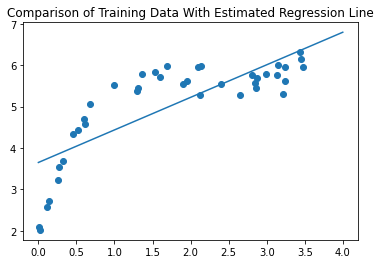

In [10]:
#Display computed regression line over training data to estimate fit

pred_x = np.linspace(0, 4, num=500)
pred_y = soln[0]*pred_x + soln[1]

ax = plt.axes()

ax.plot(pred_x, pred_y)
x_train.columns = ['data', 'ones']
ax.scatter(x_train['data'], y_train)
plt.title("Comparison of Training Data With Estimated Regression Line")

In [11]:
#Compute error for the train set

y_train.columns = ['data']

train_err = 0

for idx, row in y_train.iterrows():
  train_err += ((soln[0]*x_train['data'][idx] + soln[1]) - y_train['data'][idx]) ** 2

train_err /= y_train.shape[0]
train_err *= 100

print("Training error for linear regression is: " + str(train_err[0]) + " %")

Training error for linear regression is: 49.155747873335415 %


Text(0.5, 1.0, 'Comparison of Test Data With Estimated Regression Line')

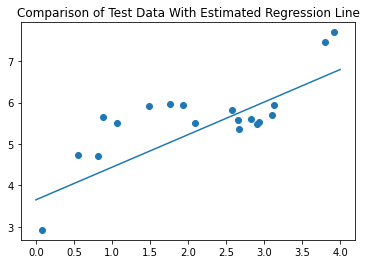

In [12]:
#Display computed regression line over test data to estimate fit

pred_x = np.linspace(0, 4, num=500)
pred_y = soln[0]*pred_x + soln[1]

ax = plt.axes()

ax.plot(pred_x, pred_y)
ax.scatter(x_test, y_test)
plt.title("Comparison of Test Data With Estimated Regression Line")

In [13]:
y_test.columns = ['data']
x_test.columns = ['data']

test_err = 0

for idx, row in y_test.iterrows():
  test_err += ((soln[0]*x_test['data'][idx] + soln[1]) - y_test['data'][idx]) ** 2

test_err /= y_test.shape[0]
test_err *= 100

print("Testing error for linear regression is: " + str(test_err[0]) + " %")

Testing error for linear regression is: 47.8900250829499 %


With high training and test error it is evident that the linear regression model is a poor fit to the dataset.

# Question 2: Quadratic Fit Regression
d) Repeat the prior process but now by applying a quadratic fit

In [14]:
#Formulate list of squared x training values and create dataframe from it

square_x = []
for idx in range(x_train.shape[0]):
  squared_sample = x_train['data'][idx] ** 2
  square_x.append(squared_sample)

x_train_quad = pd.DataFrame(square_x)
x_train_quad = pd.merge(x_train_quad, x_train, left_index=True, right_index=True)
x_train_quad.columns = ['squared data', 'data', 'ones']
x_train_quad.head()

,squared data,data,ones
0,9.848239,3.138190,1
1,11.848390,3.442149,1
2,1.711756,1.308341,1
3,0.990905,0.995442,1
4,10.507030,3.241455,1


In [15]:
#Repeat process of computing the regression coefficients, but now use the matrix including squared values

x_train_quad_matrix = x_train_quad.to_numpy()
x_train_quad_matrix_t = x_train_quad.transpose()
print("Shape of quadratic X matrix is: " + str(x_train_quad_matrix.shape))
print("Shape of transpose of quadratic X matrix is: " + str(x_train_quad_matrix_t.shape))

x_T_x_quad = np.matmul(x_train_quad_matrix_t, x_train_quad_matrix)
print("Shape of quadratic (X^T)X is: " + str(x_T_x_quad.shape))

x_T_x_quad_inv = np.linalg.inv(x_T_x_quad)
print("Shape of quadratic ((X^T)X)-1 is: " + str(x_T_x_quad_inv.shape))

x_T_y_quad = np.matmul(x_train_quad_matrix_t, y_train_matrix)
print("Shape of quadratic (X^T)y is: " + str(x_T_y_quad.shape))

soln_quad = np.matmul(x_T_x_quad_inv, x_T_y_quad)
print("\nSolution coefficients assuming quadratic fit are: " + str(soln_quad))

Shape of quadratic X matrix is: (39, 3)
Shape of transpose of quadratic X matrix is: (3, 39)
Shape of quadratic (X^T)X is: (3, 3)
Shape of quadratic ((X^T)X)-1 is: (3, 3)
Shape of quadratic (X^T)y is: (3, 1)

Solution coefficients assuming quadratic fit are:           0
0 -0.541570
1  2.671826
2  2.748961


In [16]:
#Compute error for the train set

train_err = 0

for idx, row in y_train.iterrows():
  train_err += ((soln_quad[0][0]*(x_train['data'][idx]**2) + soln_quad[0][1]*(x_train['data'][idx]) + soln_quad[0][2]) - y_train['data'][idx]) ** 2

train_err /= y_train.shape[0]
train_err *= 100

print("Training error for quadratic fit regression is: " + str(train_err) + " %")

Training error for quadratic fit regression is: 18.89808989050922 %


Text(0.5, 1.0, 'Comparison of Training Data With Estimated Quadratic Regression Line')

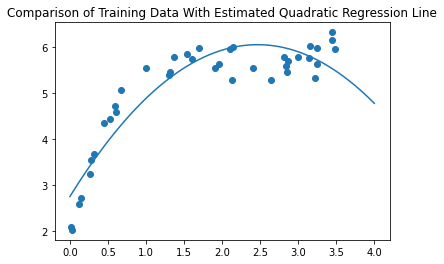

In [17]:
#Display computed regression line over training data to estimate fit

pred_x_quad = np.linspace(0, 4, num=500)

pred_y_quad = soln_quad[0][0]*(pred_x_quad**2) + soln_quad[0][1]*(pred_x_quad) + soln_quad[0][2]

ax = plt.axes()

ax.plot(pred_x_quad, pred_y_quad)
ax.scatter(x_train['data'], y_train)
plt.title("Comparison of Training Data With Estimated Quadratic Regression Line")

In [18]:
#Compute error for the test set

test_err = 0

for idx, row in y_test.iterrows():
  test_err += ((soln_quad[0][0]*(x_test['data'][idx]**2) + soln_quad[0][1]*(x_test['data'][idx]) + soln_quad[0][2]) - y_test['data'][idx]) ** 2

test_err /= y_test.shape[0]
test_err *= 100

print("Test error for quadratic fit regression is: " + str(test_err) + " %")

Test error for quadratic fit regression is: 87.87140761954036 %


Text(0.5, 1.0, 'Comparison of Test Data With Estimated Quadratic Regression Line')

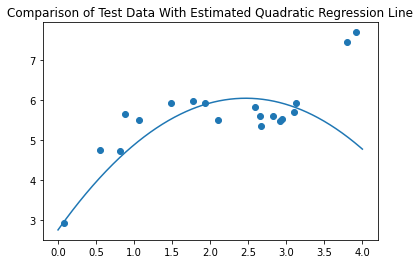

In [19]:
#Display computed regression line over test data to estimate fit

pred_x_quad = np.linspace(0, 4, num=500)

pred_y_quad = soln_quad[0][0]*(pred_x_quad**2) + soln_quad[0][1]*(pred_x_quad) + soln_quad[0][2]

ax = plt.axes()

ax.plot(pred_x_quad, pred_y_quad)
ax.scatter(x_test['data'], y_test)
plt.title("Comparison of Test Data With Estimated Quadratic Regression Line")

With lower training and test error and evidently a better fit as shown on the graph, the quadratic fit models the data better than a simple linear regression.

# Question 2: Cubic Fit Regression
e) Repeat the prior process but now by applying a cubic fit

In [20]:
#Formulate list of cubic x training values and create dataframe from it

cube_x = []
for idx in range(x_train.shape[0]):
  cubed_sample = x_train['data'][idx] ** 3
  cube_x.append(cubed_sample)

x_train_cubic = pd.DataFrame(cube_x)
x_train_cubic = pd.merge(x_train_cubic, x_train_quad, left_index=True, right_index=True)
x_train_cubic.columns = ['cubic data', 'squared data', 'data', 'ones']
x_train_cubic.head()

,cubic data,squared data,data,ones
0,30.905649,9.848239,3.138190,1
1,40.783923,11.848390,3.442149,1
2,2.239560,1.711756,1.308341,1
3,0.986388,0.990905,0.995442,1
4,34.058063,10.507030,3.241455,1


In [21]:
#Repeat process of computing the regression coefficients, but now use the matrix including cubic values

x_train_cubic_matrix = x_train_cubic.to_numpy()
x_train_cubic_matrix_t = x_train_cubic_matrix.transpose()
print("Shape of cubic X matrix is: " + str(x_train_cubic_matrix.shape))
print("Shape of transpose of cubic X matrix is: " + str(x_train_cubic_matrix_t.shape))

x_T_x_cubic = np.matmul(x_train_cubic_matrix_t, x_train_cubic_matrix)
print("Shape of cubic (X^T)X is: " + str(x_T_x_cubic.shape))

x_T_x_cubic_inv = np.linalg.inv(x_T_x_cubic)
print("Shape of cubic ((X^T)X)-1 is: " + str(x_T_x_cubic_inv.shape))

x_T_y_cubic = np.matmul(x_train_cubic_matrix_t, y_train_matrix)
print("Shape of cubic (X^T)y is: " + str(x_T_y_cubic.shape))

soln_cubic = np.matmul(x_T_x_cubic_inv, x_T_y_cubic)
print("\nSolution coefficients assuming cubic fit are:\n " + str(soln_cubic))

Shape of cubic X matrix is: (39, 4)
Shape of transpose of cubic X matrix is: (4, 39)
Shape of cubic (X^T)X is: (4, 4)
Shape of cubic ((X^T)X)-1 is: (4, 4)
Shape of cubic (X^T)y is: (4, 1)

Solution coefficients assuming cubic fit are:
 [[ 0.45618402]
 [-2.93764873]
 [ 5.89890212]
 [ 2.02128043]]


In [22]:
#Compute error for the train set

train_err = 0

for idx, row in y_train.iterrows():
  train_err += ((soln_cubic[0][0]*(x_train['data'][idx]**3) + soln_cubic[1][0]*(x_train['data'][idx]**2) + soln_cubic[2][0]*(x_train['data'][idx]) + soln_cubic[3][0]) - y_train['data'][idx]) ** 2

train_err /= y_train.shape[0]
train_err *= 100

print("Training error for cubic fit regression is: " + str(train_err) + " %")

Training error for cubic fit regression is: 3.8387363121714917 %


Text(0.5, 1.0, 'Comparison of Training Data With Estimated Cubic Regression Line')

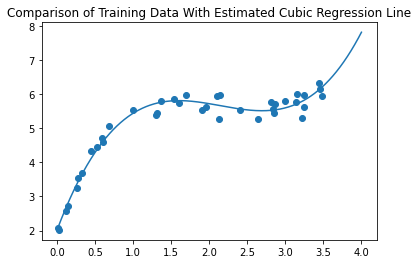

In [23]:
#Display computed regression line over training data to estimate fit

pred_x_quad = np.linspace(0, 4, num=500)


pred_y_quad = soln_cubic[0][0]*(pred_x_quad**3) + soln_cubic[1][0]*(pred_x_quad**2) + soln_cubic[2][0]*pred_x_quad + soln_cubic[3][0]

ax = plt.axes()

ax.plot(pred_x_quad, pred_y_quad)
ax.scatter(x_train['data'], y_train)
plt.title("Comparison of Training Data With Estimated Cubic Regression Line")

In [24]:
#Compute error for the test set

test_err = 0

for idx, row in y_test.iterrows():
  test_err += ((soln_cubic[0][0]*(x_test['data'][idx]**3) + soln_cubic[1][0]*(x_test['data'][idx]**2) + soln_cubic[2][0]*(x_test['data'][idx]) + soln_cubic[3][0]) - y_test['data'][idx]) ** 2

test_err /= y_test.shape[0]
test_err *= 100

print("Test error for quadratic fit regression is: " + str(test_err) + " %")

Test error for quadratic fit regression is: 6.10285031186408 %


Text(0.5, 1.0, 'Comparison of Test Data With Estimated Cubic Regression Line')

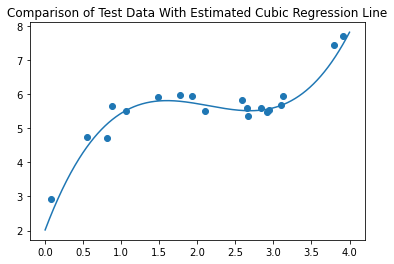

In [25]:
#Display computed regression line over test data to estimate fit

pred_x_quad = np.linspace(0, 4, num=500)


pred_y_quad = soln_cubic[0][0]*(pred_x_quad**3) + soln_cubic[1][0]*(pred_x_quad**2) + soln_cubic[2][0]*pred_x_quad + soln_cubic[3][0]

ax = plt.axes()

ax.plot(pred_x_quad, pred_y_quad)
ax.scatter(x_test['data'], y_test)
plt.title("Comparison of Test Data With Estimated Cubic Regression Line")

With even lower training and test error and a great fit as shown in the graph, cubic regression outperforms both linear and quadratic regression. Not only does the model fit the training set well, but its accuracy remains high in the test set indicating overfitting is not taking place. Overall the cubic model offers the ideal bias-variance tradeoff. 

# Question 2: Polynomial Fit Regression
f) Repeat the prior process but now by applying a fourth-degree (polynomial) fit

In [26]:
#Formulate list of polynomial x training values and create dataframe from it

poly_x = []
for idx in range(x_train.shape[0]):
  poly_sample = x_train['data'][idx] ** 4
  poly_x.append(poly_sample)

x_train_poly = pd.DataFrame(poly_x)
x_train_poly = pd.merge(x_train_poly, x_train_cubic, left_index=True, right_index=True)
x_train_poly.columns = ['polynomial data', 'cubic data', 'squared data', 'data', 'ones']
x_train_poly.head()

,polynomial data,cubic data,squared data,data,ones
0,96.987811,30.905649,9.848239,3.138190,1
1,140.384339,40.783923,11.848390,3.442149,1
2,2.930107,2.239560,1.711756,1.308341,1
3,0.981892,0.986388,0.990905,0.995442,1
4,110.397677,34.058063,10.507030,3.241455,1


In [27]:
#Repeat process of computing the regression coefficients, but now use the matrix including cubic values

x_train_poly_matrix = x_train_poly.to_numpy()
x_train_poly_matrix_t = x_train_poly_matrix.transpose()
print("Shape of polynomial X matrix is: " + str(x_train_poly_matrix.shape))
print("Shape of transpose of polynomial X matrix is: " + str(x_train_poly_matrix_t.shape))

x_T_x_poly = np.matmul(x_train_poly_matrix_t, x_train_poly_matrix)
print("Shape of polynomial (X^T)X is: " + str(x_T_x_poly.shape))

x_T_x_poly_inv = np.linalg.inv(x_T_x_poly)
print("Shape of polynomial ((X^T)X)-1 is: " + str(x_T_x_poly_inv.shape))

x_T_y_poly = np.matmul(x_train_poly_matrix_t, y_train_matrix)
print("Shape of polynomial (X^T)y is: " + str(x_T_y_poly.shape))

soln_poly = np.matmul(x_T_x_poly_inv, x_T_y_poly)
print("\nSolution coefficients assuming polynomial fit are:\n " + str(soln_poly))

Shape of polynomial X matrix is: (39, 5)
Shape of transpose of polynomial X matrix is: (5, 39)
Shape of polynomial (X^T)X is: (5, 5)
Shape of polynomial ((X^T)X)-1 is: (5, 5)
Shape of polynomial (X^T)y is: (5, 1)

Solution coefficients assuming polynomial fit are:
 [[-0.06488959]
 [ 0.91257989]
 [-3.95817476]
 [ 6.6614613 ]
 [ 1.91279237]]


In [28]:
#Compute error for the train set

train_err = 0

for idx, row in y_train.iterrows():
  train_err += ((soln_poly[0][0]*(x_train['data'][idx]**4) + soln_poly[1][0]*(x_train['data'][idx]**3) + soln_poly[2][0]*(x_train['data'][idx]**2) + soln_poly[3][0]*(x_train['data'][idx]) + soln_poly[4][0]) - y_train['data'][idx]) ** 2

train_err /= y_train.shape[0]
train_err *= 100

print("Training error for polynomial fit regression is: " + str(train_err) + " %")

Training error for polynomial fit regression is: 3.538250994768572 %


Text(0.5, 1.0, 'Comparison of Training Data With Estimated Polynomial Regression Line')

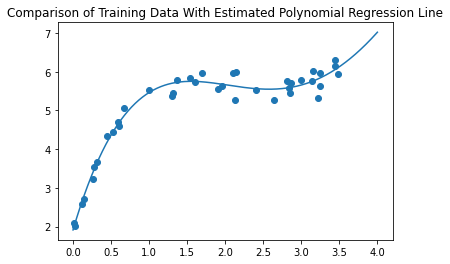

In [29]:
#Display computed regression line over training data to estimate fit

pred_x_quad = np.linspace(0, 4, num=500)


pred_y_quad = soln_poly[0][0]*(pred_x_quad**4) + soln_poly[1][0]*(pred_x_quad**3) + soln_poly[2][0]*(pred_x_quad**2) + soln_poly[3][0]*(pred_x_quad) + soln_poly[4][0]

ax = plt.axes()

ax.plot(pred_x_quad, pred_y_quad)
ax.scatter(x_train['data'], y_train)
plt.title("Comparison of Training Data With Estimated Polynomial Regression Line")

In [30]:
#Compute error for the test set

test_err = 0

for idx, row in y_test.iterrows():
  test_err += ((soln_poly[0][0]*(x_test['data'][idx]**4) + soln_poly[1][0]*(x_test['data'][idx]**3) + soln_poly[2][0]*(x_test['data'][idx]**2) + soln_poly[3][0]*(x_test['data'][idx]) + soln_poly[4][0]) - y_test['data'][idx]) ** 2

test_err /= y_test.shape[0]
test_err *= 100

print("Test error for polynomial fit regression is: " + str(test_err) + " %")

Test error for polynomial fit regression is: 12.909757166633911 %


Text(0.5, 1.0, 'Comparison of Test Data With Estimated Polynomial Regression Line')

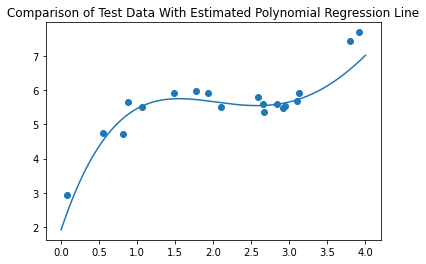

In [31]:
#Display computed regression line over training data to estimate fit

pred_x_quad = np.linspace(0, 4, num=500)


pred_y_quad = soln_poly[0][0]*(pred_x_quad**4) + soln_poly[1][0]*(pred_x_quad**3) + soln_poly[2][0]*(pred_x_quad**2) + soln_poly[3][0]*(pred_x_quad) + soln_poly[4][0]

ax = plt.axes()

ax.plot(pred_x_quad, pred_y_quad)
ax.scatter(x_test['data'], y_test)
plt.title("Comparison of Test Data With Estimated Polynomial Regression Line")

Evidently applying a polynomial fit to the regression results in better training accuracy however worse performance in test accuracy. This implies that the model gets overfitted to the training set and cannot generalise to results presented in the test set. Hence the polynomial fit regression model performs better than both linear and quadratic regression, but worse than cubic regression.

# Question 3: L2-Regularization Parameter Computation

a) L2-Regularization Computation and Set-Up

In [32]:
#Given (X^T)X is a 5x5 matrix for polynomial regression, the I matrix required in l2-regularized regression must match this dimensionality
#The matrix is constant therefore it can be generated manually

I_m = np.matrix('0 0 0 0 0; 0 1 0 0 0; 0 0 1 0 0; 0 0 0 1 0; 0 0 0 0 1')
I_m

matrix([[0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])

Vary the value of lambda in range: 0.01, 0.1, 1, 10, 100, 1000 to compute l2-regularized polynomial-fit regression coefficients. Afterwards plot the results.



In [33]:
def l2_regularized_coeff(penalty, I_matrix_lambda):
  I_matrix = I_matrix_lambda
  I_matrix = penalty * I_matrix

  x_T_x_poly_I_m = np.add(x_T_x_poly, I_matrix)

  x_T_x_poly_I_m_inv = np.linalg.inv(x_T_x_poly_I_m)

  soln_poly_lambda = np.matmul(x_T_x_poly_I_m_inv, x_T_y_poly)
  print("\nSolution coefficients assuming l2-regularized polynomial fit where lambda = " + str(penalty) + " are:\n " + str(soln_poly_lambda) + "\n")
  print("----------------------------------------------------------------------------------------------------------------------------------------------")

  return soln_poly_lambda

In [34]:
I_m_1 = l2_regularized_coeff(0.01, I_m)
I_m_2 = l2_regularized_coeff(0.1, I_m)
I_m_3 = l2_regularized_coeff(1, I_m)
I_m_4 = l2_regularized_coeff(10, I_m)
I_m_5 = l2_regularized_coeff(100, I_m)
I_m_6 = l2_regularized_coeff(1000, I_m)


Solution coefficients assuming l2-regularized polynomial fit where lambda = 0.01 are:
 [[-0.02144161]
 [ 0.58702145]
 [-3.16483774]
 [ 5.99128994]
 [ 2.02611896]]

----------------------------------------------------------------------------------------------------------------------------------------------

Solution coefficients assuming l2-regularized polynomial fit where lambda = 0.1 are:
 [[ 0.11080097]
 [-0.41711361]
 [-0.6763483 ]
 [ 3.84550832]
 [ 2.39062204]]

----------------------------------------------------------------------------------------------------------------------------------------------

Solution coefficients assuming l2-regularized polynomial fit where lambda = 1 are:
 [[ 0.13959663]
 [-0.78393635]
 [ 0.68243036]
 [ 2.24087034]
 [ 2.62955257]]

----------------------------------------------------------------------------------------------------------------------------------------------

Solution coefficients assuming l2-regularized polynomial fit where lambda = 10 

In [35]:
combined_coefficients = np.hstack((I_m_1, I_m_2, I_m_3, I_m_4, I_m_5, I_m_6)).transpose()
print("Representing the combination regression coefficients varied with the penalty (lambda) as a singular array wherein each column stores variation of each coefficient with shape " + str(combined_coefficients.shape))

Representing the combination regression coefficients varied with the penalty (lambda) as a singular array wherein each column stores variation of each coefficient with shape (6, 5)


## Question 3: Plotting the Relation Between Train, Test Error and the Penalty Coefficient (Lambda) ##

Compute the training and test for each set of regression coefficients when applying a certain value to the penalty term (lambda)

In [36]:
def compute_train_err_poly(soln): 

#Compute error for the train set

  train_err = 0

  for idx, row in y_train.iterrows():
    train_err += ((soln[0][0]*(x_train['data'][idx]**4) + soln[0][1]*(x_train['data'][idx]**3) + soln[0][2]*(x_train['data'][idx]**2) + soln[0][3]*(x_train['data'][idx]) + soln[0][4]) - y_train['data'][idx]) ** 2

  train_err /= y_train.shape[0]

  return train_err

In [37]:
def compute_test_err_poly(soln): 

#Compute error for the train set

  test_err = 0

  for idx, row in y_test.iterrows():
    test_err += ((soln[0][0]*(x_test['data'][idx]**4) + soln[0][1]*(x_test['data'][idx]**3) + soln[0][2]*(x_test['data'][idx]**2) + soln[0][3]*(x_test['data'][idx]) + soln[0][4]) - y_test['data'][idx]) ** 2

  test_err /= y_test.shape[0]

  return test_err

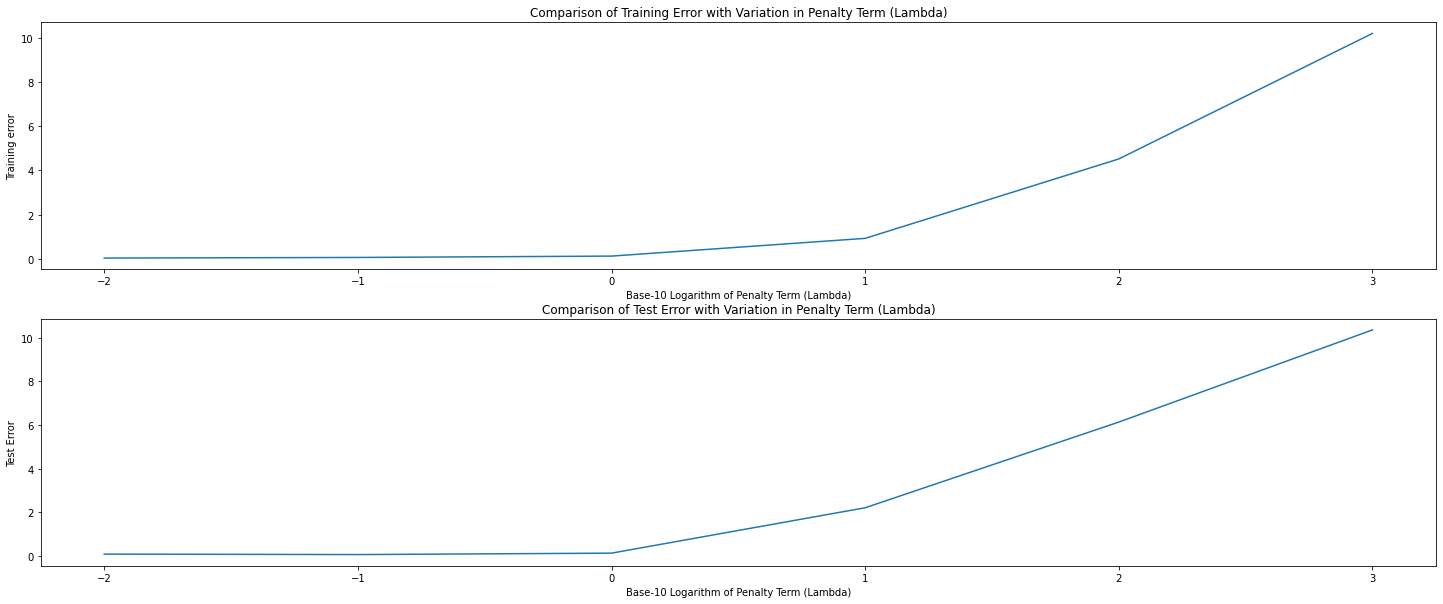

In [38]:
import math
lambda_vals = [0.01, 0.1, 1, 10, 100, 1000]
logged_lambda_vals = [round(math.log(x, 10)) for x in lambda_vals]

training_err_all_lambda = [compute_train_err_poly(combined_coefficients[i, :].tolist()) for i in range(combined_coefficients.shape[0])]
test_err_all_lambda = [compute_test_err_poly(combined_coefficients[i, :].tolist()) for i in range(combined_coefficients.shape[0])]

plt.rcParams['figure.figsize'] = [25, 10]

fig, axs = plt.subplots(2)
axs[0].set_title("Comparison of Training Error with Variation in Penalty Term (Lambda)")
axs[0].set_xlabel("Base-10 Logarithm of Penalty Term (Lambda)")
axs[0].set_ylabel("Training error")
axs[0].plot(logged_lambda_vals, training_err_all_lambda)
axs[1].set_title("Comparison of Test Error with Variation in Penalty Term (Lambda)")
axs[1].set_xlabel("Base-10 Logarithm of Penalty Term (Lambda)")
axs[1].set_ylabel("Test Error")

axs[1].plot(logged_lambda_vals, test_err_all_lambda)

Evidently the lowest penalty coefficient yields the best results in both test and train sets. However to maintain a proper bias-variance tradeoff, it is optimal to select the largest penalty such that the model maintains enough complexity to generalise. In that case, selecting the value where lambda = 1 is ideal (log(1) = 0 on the plot, hence lambda = 1).

## Plotting the Relation Between Regression Coefficients and the Penalty Term (Lambda) ##

b) Similarly, plot the change in each regression coefficient's value given a certain value of the penalty (lambda). 

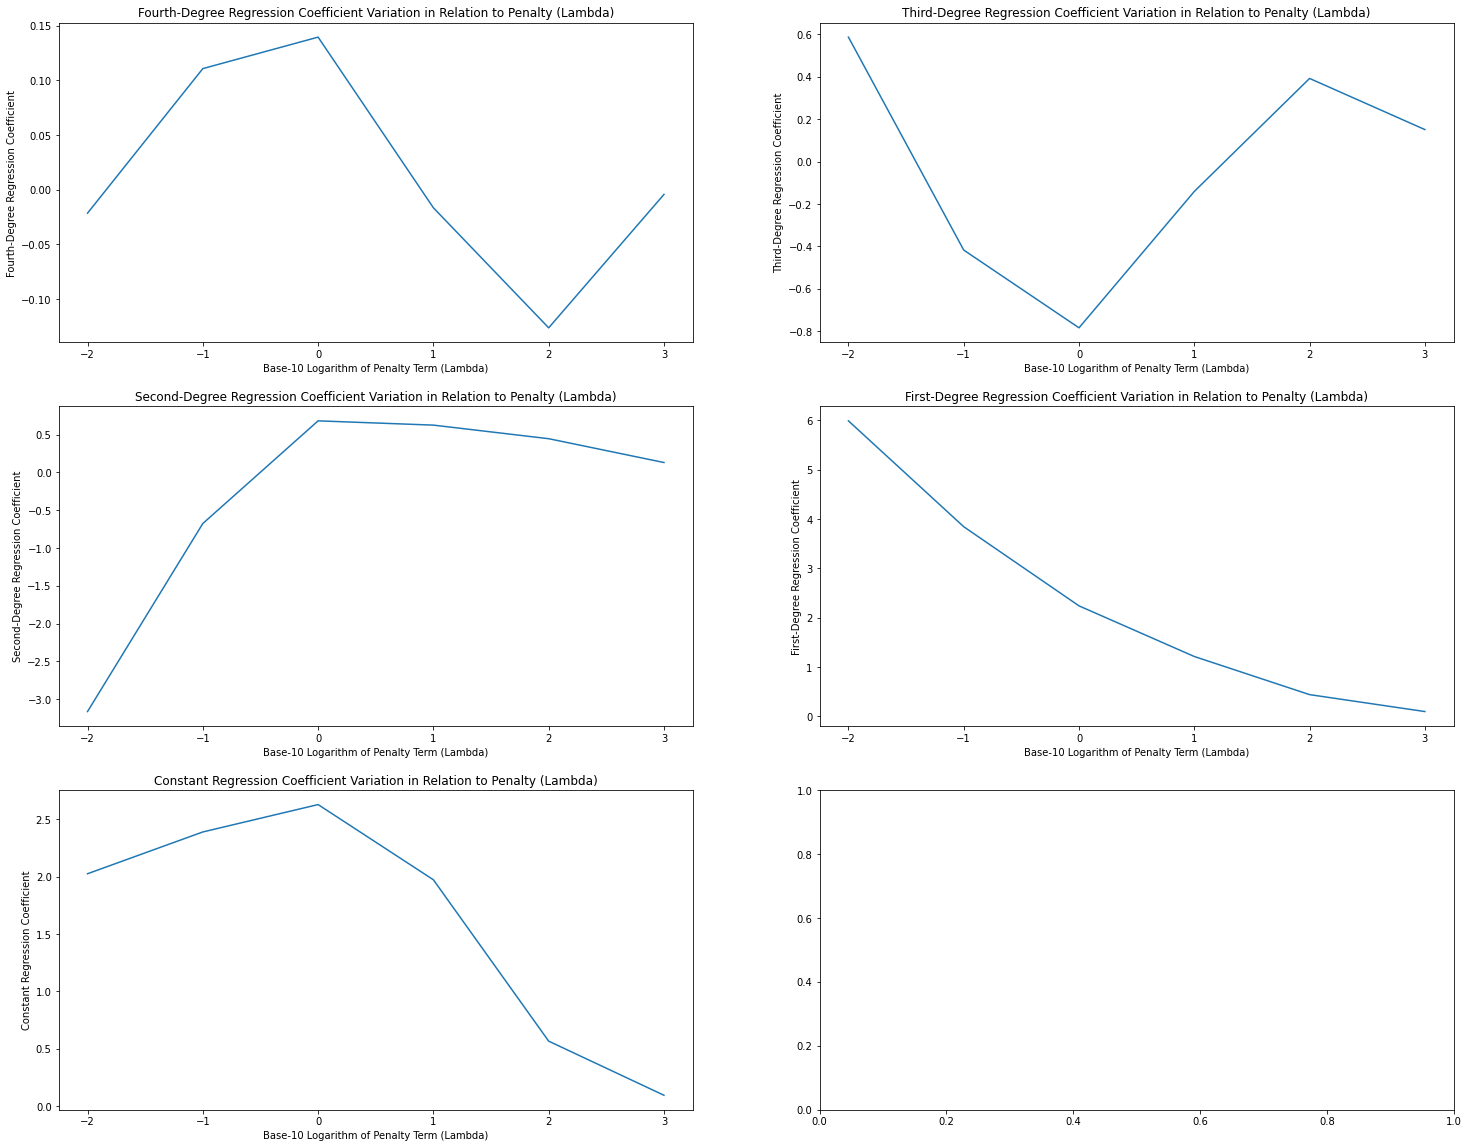

In [39]:
plt.rcParams['figure.figsize'] = [25, 20]

fig, axs = plt.subplots(3, 2)

#There exist five coefficients in polynomial regression: the four polynomial terms and the constant term; plot each one's variation with the penalty for comparison

axs[0, 0].set_title("Fourth-Degree Regression Coefficient Variation in Relation to Penalty (Lambda)")
axs[0, 0].set_xlabel("Base-10 Logarithm of Penalty Term (Lambda)")
axs[0, 0].set_ylabel("Fourth-Degree Regression Coefficient")
axs[0, 0].plot(logged_lambda_vals, combined_coefficients[:, 0])

axs[0, 1].set_title("Third-Degree Regression Coefficient Variation in Relation to Penalty (Lambda)")
axs[0, 1].set_xlabel("Base-10 Logarithm of Penalty Term (Lambda)")
axs[0, 1].set_ylabel("Third-Degree Regression Coefficient")
axs[0, 1].plot(logged_lambda_vals, combined_coefficients[:, 1])

axs[1, 0].set_title("Second-Degree Regression Coefficient Variation in Relation to Penalty (Lambda)")
axs[1, 0].set_xlabel("Base-10 Logarithm of Penalty Term (Lambda)")
axs[1, 0].set_ylabel("Second-Degree Regression Coefficient")
axs[1, 0].plot(logged_lambda_vals, combined_coefficients[:, 2])

axs[1, 1].set_title("First-Degree Regression Coefficient Variation in Relation to Penalty (Lambda)")
axs[1, 1].set_xlabel("Base-10 Logarithm of Penalty Term (Lambda)")
axs[1, 1].set_ylabel("First-Degree Regression Coefficient")
axs[1, 1].plot(logged_lambda_vals, combined_coefficients[:, 3])

axs[2, 0].set_title("Constant Regression Coefficient Variation in Relation to Penalty (Lambda)")
axs[2, 0].set_xlabel("Base-10 Logarithm of Penalty Term (Lambda)")
axs[2, 0].set_ylabel("Constant Regression Coefficient")
axs[2, 0].plot(logged_lambda_vals, combined_coefficients[:, 4])

It is evident that the lower degree quadratic, linear and constant terms follow a linear relationship with the penalty coefficient, either increasing or decreasing with it. Hence the penalty coefficient applies well to those terms. However the higher degree cubic and polynomial terms have no clear relationship with the penalty coefficient. 

## Performing Five-Fold Cross-Validation for Computing Best Penalty Term ##
c) There is no way to 'train' the model on multiple splits of the dataset since it is a regression problem. Only an exact solution exists, hence on every iteration of training, the model parameters will completely change indifferent to the prior loops. In this case it makes sense to simply test directly on the validation set every time. However in doing so, that is mathematically equivalent to taking the average over all training results, which has already been done.

Hence applying five-fold cross validation to an exact, invertible regression problem is infeasible. The resulting ideal value for the penalty coefficient (lambda) will remain unchanged from before as five-fold cross-validation will just repeat the process.